In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

BEML.csv                       Normal Disribution.ipynb
Confidence Interval (1).ipynb  beml_df.csv
Confidence Interval.ipynb      glaxo_df.csv
GLAXO.csv


In [7]:
beml_df = pd.read_csv("BEML.csv")
beml_df.head(2)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.0,1121.00,1134.0,1135.6,101651.0,1157.18
1,2010-01-05,1146.8,1149.0,1128.75,1135.0,1134.6,59504.0,676.47


In [8]:
beml_df.tail(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1737,2016-12-29,977.1,997.95,974.55,985.15,986.05,555233.0,5489.14
1738,2016-12-30,986.0,1006.95,985.90,1004.00,1000.60,460675.0,4606.48


In [9]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [14]:
glaxo_df.shape[0]/250

6.956

In [11]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [15]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [16]:
'''These DataFrames have a date column, so we can
create a DatetimeIndex index from the column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))


In [17]:
glaxo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1739 non-null   object 
 1   Close   1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.8+ KB


In [18]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


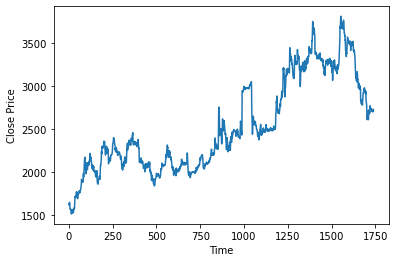

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

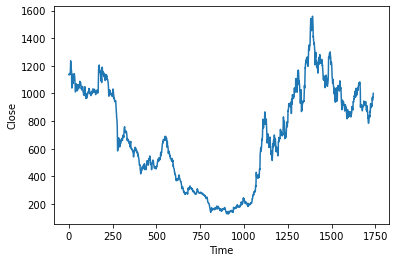

In [21]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [22]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [23]:
glaxo_df.head()

,Date,Close,gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398


In [24]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

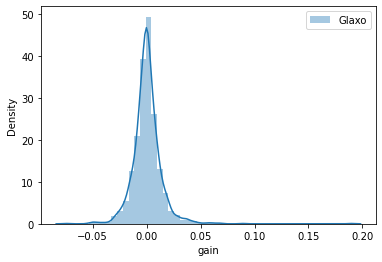

In [25]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

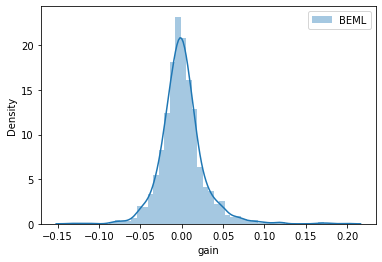

In [26]:
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

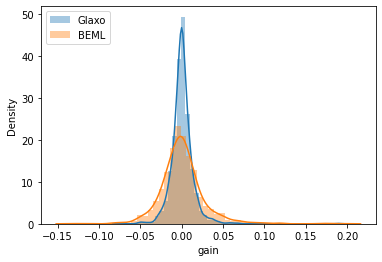

In [27]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend(loc="upper left")

In [28]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.var(), 4))

Mean: 0.0004
Standard Deviation:  0.0002


In [29]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.var(), 4))

Mean:  0.0003
Standard Deviation:  0.0007


In [10]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.06352488667177397

In [11]:
stats.norm.cdf( -0.02,
beml_df.gain.mean(),
beml_df.gain.std())

0.22155987503755292

In [12]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
glaxo_df.gain.mean(),
glaxo_df.gain.std())

0.07104511457618568

In [23]:
1 - stats.norm.cdf(0.02,
beml_df.gain.mean(),
beml_df.gain.std())

0.22769829484075343

### Inclass Exercise

### Compute 2% loss or gain for BEML

In [36]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343

In [29]:
 from scipy import stats 
 stats.norm.cdf(500,711,29)   

1.7210757653128373e-13

In [6]:
 stats.norm.cdf(740,711,29)   - stats.norm.cdf(697,711,29)   

0.5267111786415019

In [28]:
stats.norm.ppf(0.1)

-1.2815515655446004